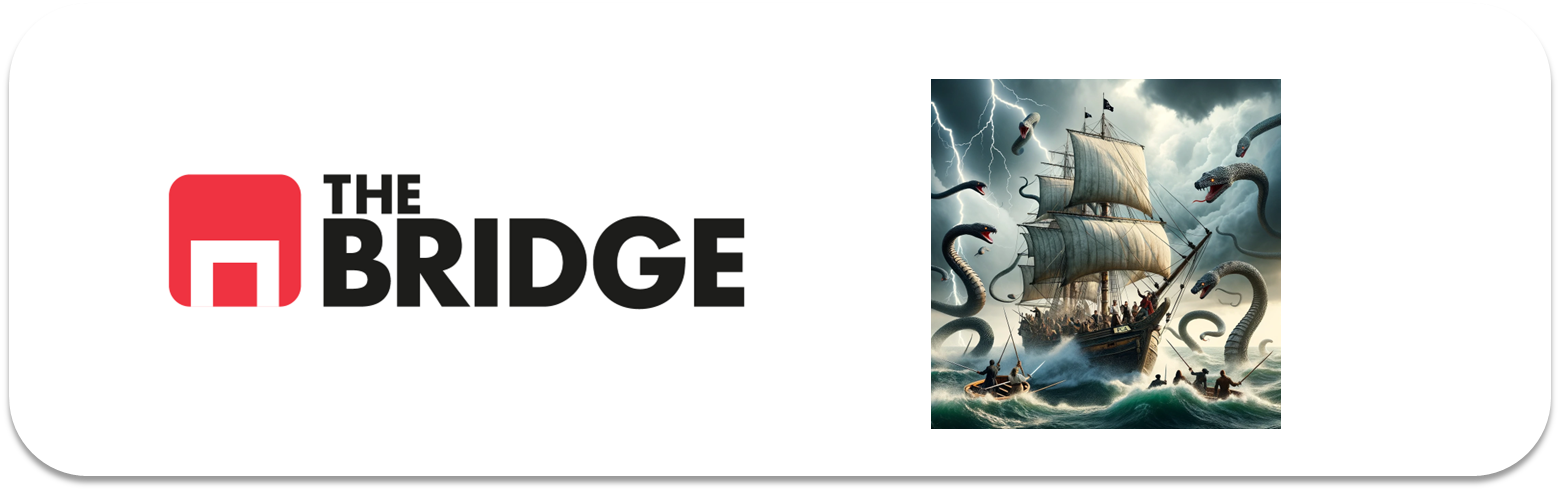

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, mean_squared_error, balanced_accuracy_score, classification_report, confusion_matrix, accuracy_score
from scipy.stats import pearsonr

from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, recall_score

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings(action='ignore', message='internatl gelsd')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [90]:
df = pd.read_csv(r"./data/credit_npo.csv")
df.columns


Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [91]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [93]:

target="SeriousDlqin2yrs"

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [95]:
df.dropna(inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [97]:
df.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10314
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11472
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

In [99]:
number_cols = [col for col in df.columns if col.startswith("Number") and df[col].nunique() <= 20]

def categorize_number(value):
    if value == 0:
        return 0
    elif value <= 2:
        return 1
    else:
        return 2
for col in number_cols:
    df[col] = df[col].apply(categorize_number).astype("category")

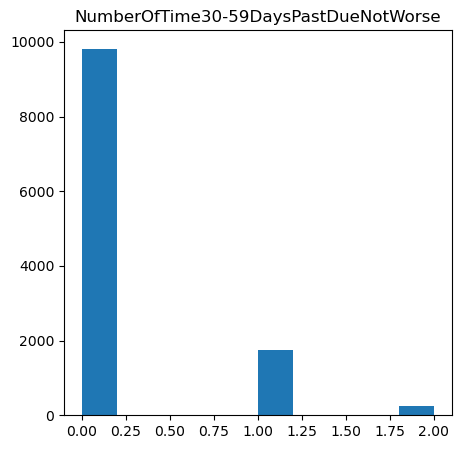

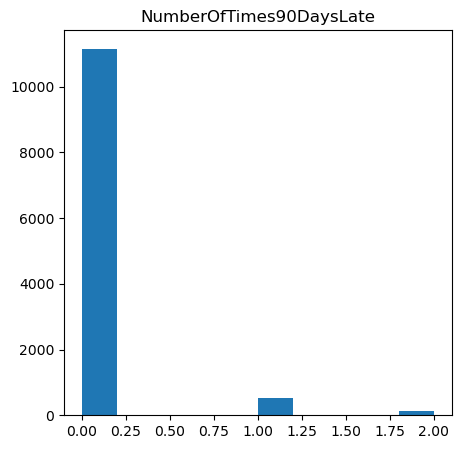

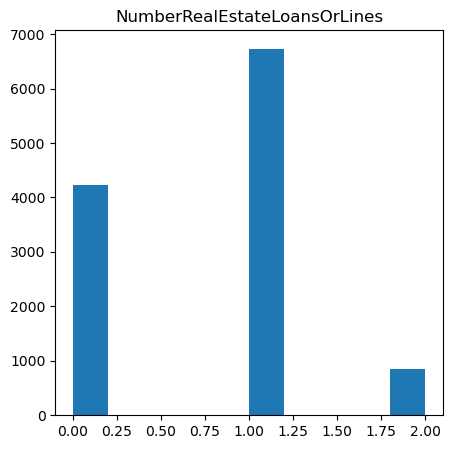

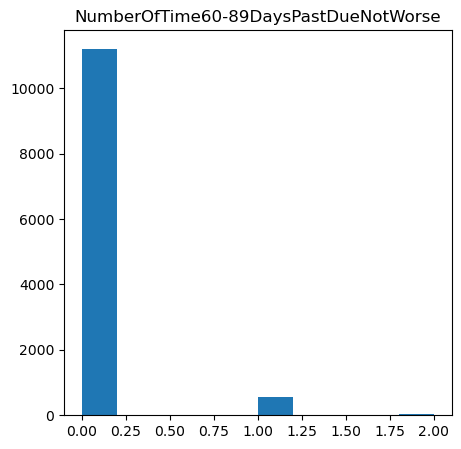

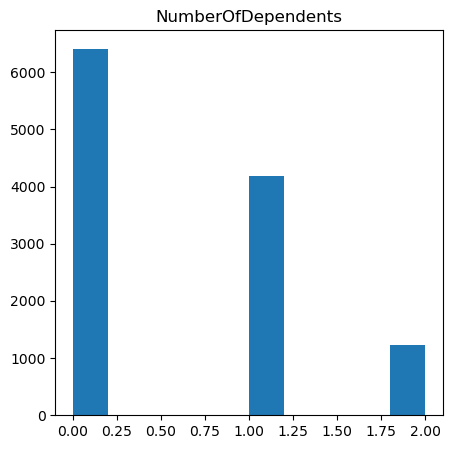

In [100]:
for col in number_cols:
    plt.figure(figsize=(5, 5))
    plt.title(col)
    plt.hist(df[col])
    plt.show

1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
4. Selección de las mejores features empleando RFE.
5. Selección de las mejores features empleando SFS.
6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [108]:
corr = df.corr()

In [109]:
corr

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.280350,-0.106076,0.252499,-0.001666,-0.022199,-0.029574,0.367893,-0.025425,0.263759,0.044138
RevolvingUtilizationOfUnsecuredLines,0.280350,1.000000,-0.258454,0.254205,0.010778,-0.046920,-0.169089,0.291137,-0.120661,0.212728,0.065409
age,-0.106076,-0.258454,1.000000,-0.071051,-0.008830,0.053273,0.177826,-0.096609,0.099159,-0.067103,-0.194877
NumberOfTime30-59DaysPastDueNotWorse,0.252499,0.254205,-0.071051,1.000000,-0.001121,-0.012008,0.056380,0.270392,0.018790,0.298880,0.053284
DebtRatio,-0.001666,0.010778,-0.008830,-0.001121,1.000000,-0.036568,0.024201,-0.008039,0.015507,-0.004822,-0.004178
MonthlyIncome,-0.022199,-0.046920,0.053273,-0.012008,-0.036568,1.000000,0.105096,-0.035442,0.148168,-0.025407,0.075325
NumberOfOpenCreditLinesAndLoans,-0.029574,-0.169089,0.177826,0.056380,0.024201,0.105096,1.000000,-0.127651,0.410160,-0.050238,0.040973
NumberOfTimes90DaysLate,0.367893,0.291137,-0.096609,0.270392,-0.008039,-0.035442,-0.127651,1.000000,-0.109816,0.343477,0.038202
NumberRealEstateLoansOrLines,-0.025425,-0.120661,0.099159,0.018790,0.015507,0.148168,0.410160,-0.109816,1.000000,-0.054160,0.138760
NumberOfTime60-89DaysPastDueNotWorse,0.263759,0.212728,-0.067103,0.298880,-0.004822,-0.025407,-0.050238,0.343477,-0.054160,1.000000,0.022341


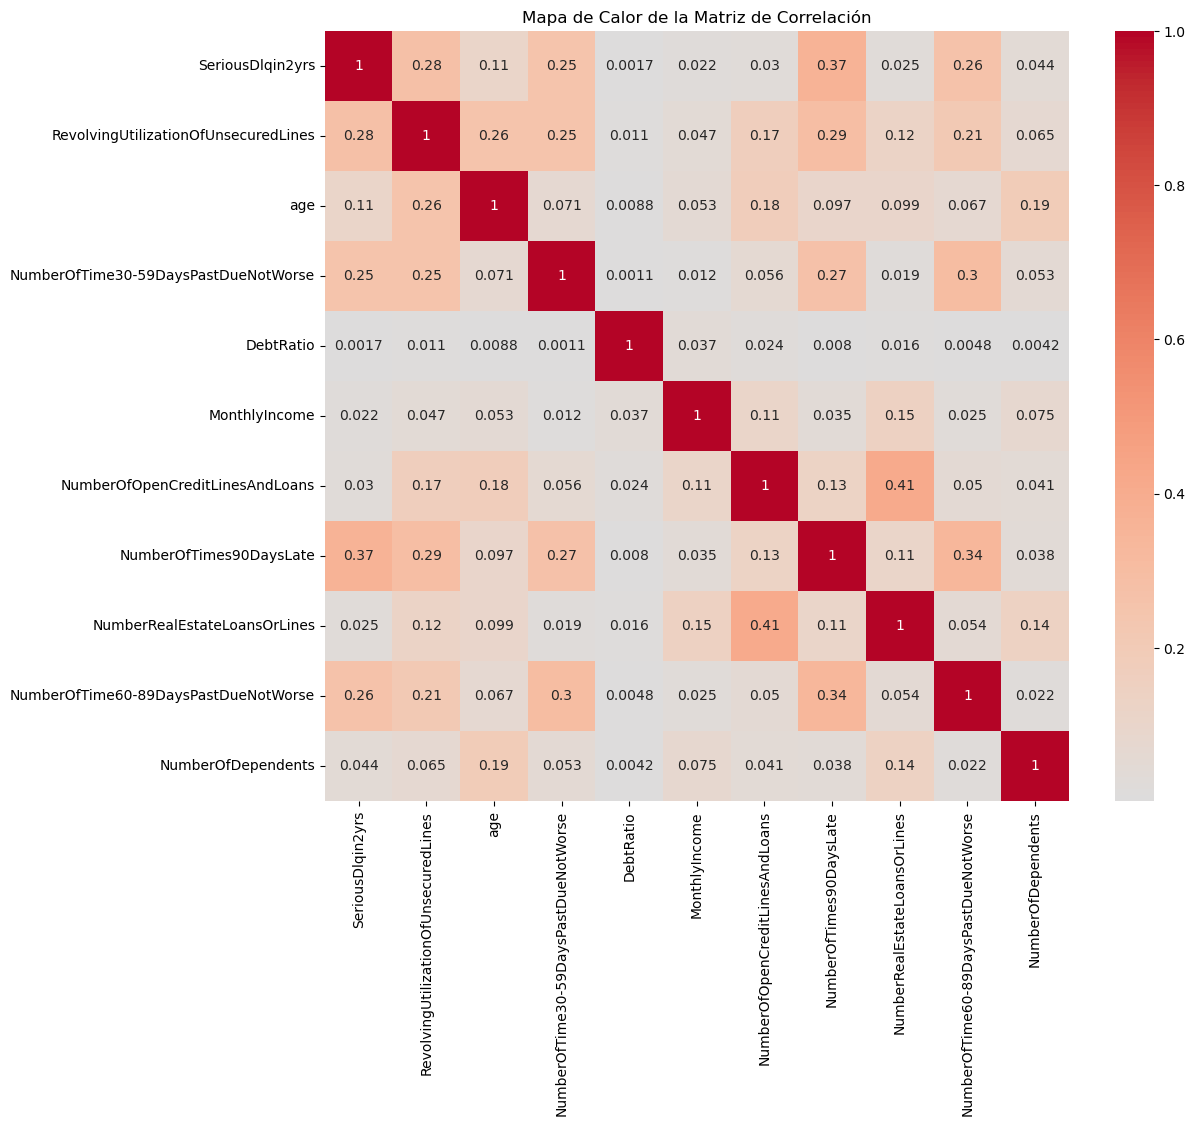

In [110]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr.abs(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [111]:
corr_min = 0.25


high_corr = corr[target].abs() > corr_min
relevant_features = high_corr[high_corr].index.tolist()
corr_filter = relevant_features

corr_filter

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [112]:
target

X=df.drop(target, axis=1)
y=df[target]

In [113]:
cat_col = X[number_cols]
num_col = X.drop(cat_col, axis=1)

cat_col = list(cat_col)
num_col = list(num_col)

In [114]:
num_selector = SelectKBest(score_func=f_classif, k=3)
X_num_selected = num_selector.fit_transform(df[num_col], y)

In [115]:
num_names = np.array(num_col)[num_selector.get_support()]

In [116]:
num_KBest = num_names

In [117]:
cat_selector = SelectKBest(score_func=mutual_info_classif, k=3)  
X_cat_selected = cat_selector.fit_transform(df[cat_col], y)

In [118]:
cat_names = np.array(cat_col)[cat_selector.get_support()]

In [119]:
cat_KBest = cat_names

In [120]:
rf = RandomForestClassifier()
selector=SelectFromModel(rf)

selector.fit(df, y)

SelectFromModel(estimator=RandomForestClassifier())

In [121]:
rf_selected_features = df.columns[selector.get_support()]
rf_selected_features


Index(['SeriousDlqin2yrs'], dtype='object')

In [122]:
selector = RFE(rf, n_features_to_select=3)
selector.fit(df, y)
rfe_selected_features = df.columns[selector.support_]
rfe_selected_features

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTimes90DaysLate'],
      dtype='object')

In [139]:
sfs = SequentialFeatureSelector(rf, n_features_to_select=3, direction='forward')
sfs.fit(df, y)
sfs_selected_features = df.columns[sfs.get_support()]
sfs_selected_features

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age'], dtype='object')

In [143]:
selected_features_df = pd.DataFrame({
    'features': df.columns,
    'rf_vote': np.isin(df.columns, rf_selected_features).astype(int),
    'rfe_vote': np.isin(df.columns, rfe_selected_features).astype(int),
    'sfs_vote': np.isin(df.columns, sfs_selected_features).astype(int)
})

selected_features_df['total_votes'] = selected_features_df[['rf_vote', 'rfe_vote', 'sfs_vote']].sum(axis=1)

In [144]:
selected_features_df

,features,rf_vote,rfe_vote,sfs_vote,total_votes
0,SeriousDlqin2yrs,1,1,1,3
1,RevolvingUtilizationOfUnsecuredLines,0,1,1,2
2,age,0,0,1,1
3,NumberOfTime30-59DaysPastDueNotWorse,0,0,0,0
4,DebtRatio,0,0,0,0
5,MonthlyIncome,0,0,0,0
6,NumberOfOpenCreditLinesAndLoans,0,0,0,0
7,NumberOfTimes90DaysLate,0,1,0,1
8,NumberRealEstateLoansOrLines,0,0,0,0
9,NumberOfTime60-89DaysPastDueNotWorse,0,0,0,0


3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.



In [148]:
feature_selections = {
    "corr_filter": corr_filter,
    "num_KBest": num_KBest,
    "cat_KBest": cat_KBest,
    "rf_selected_features": rf_selected_features,
    "rfe_selected_features": rfe_selected_features,
    "sfs_selected_features": sfs_selected_features,
}

In [154]:
feature_selections

{'corr_filter': ['SeriousDlqin2yrs',
  'RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse'],
 'num_KBest': array(['RevolvingUtilizationOfUnsecuredLines', 'age',
        'NumberOfOpenCreditLinesAndLoans'], dtype='<U36'),
 'cat_KBest': array(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
        'NumberOfTime60-89DaysPastDueNotWorse'], dtype='<U36'),
 'rf_selected_features': Index(['SeriousDlqin2yrs'], dtype='object'),
 'rfe_selected_features': Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
        'NumberOfTimes90DaysLate'],
       dtype='object'),
 'sfs_selected_features': Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age'], dtype='object')}

In [166]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True, random_state=42)
}

In [168]:
scorer = make_scorer(recall_score)
results = {}

for model_name, model in models.items():
    for feature_name, feature_list in feature_selections.items():
        X_selected = df[feature_list]
        y = df[target]
        
        recall_scores = cross_val_score(model, X_selected, y, cv=5, scoring=scorer)
        mean_recall = np.mean(recall_scores)
        results[(model_name, feature_name)] = mean_recall
        print(f"Modelo: {model_name}, Features: {feature_name}, Recall Medio: {mean_recall:.4f}")

best_model, best_features = max(results, key=results.get)

Modelo: Random Forest, Features: corr_filter, Recall Medio: 1.0000
Modelo: Random Forest, Features: num_KBest, Recall Medio: 0.1084
Modelo: Random Forest, Features: cat_KBest, Recall Medio: 0.1361
Modelo: Random Forest, Features: rf_selected_features, Recall Medio: 1.0000
Modelo: Random Forest, Features: rfe_selected_features, Recall Medio: 1.0000
Modelo: Random Forest, Features: sfs_selected_features, Recall Medio: 1.0000
Modelo: Logistic, Features: corr_filter, Recall Medio: 1.0000
Modelo: Logistic, Features: num_KBest, Recall Medio: 0.0108
Modelo: Logistic, Features: cat_KBest, Recall Medio: 0.1795
Modelo: Logistic, Features: rf_selected_features, Recall Medio: 1.0000
Modelo: Logistic, Features: rfe_selected_features, Recall Medio: 1.0000
Modelo: Logistic, Features: sfs_selected_features, Recall Medio: 1.0000


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-p

Modelo: XGBoost, Features: corr_filter, Recall Medio: 1.0000


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-p

Modelo: XGBoost, Features: num_KBest, Recall Medio: 0.0855


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-p

Modelo: XGBoost, Features: cat_KBest, Recall Medio: 0.1373
Modelo: XGBoost, Features: rf_selected_features, Recall Medio: 1.0000


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-p

Modelo: XGBoost, Features: rfe_selected_features, Recall Medio: 1.0000
Modelo: XGBoost, Features: sfs_selected_features, Recall Medio: 1.0000

Mejor modelo: Random Forest con selección de características: corr_filter, Recall: 1.0000


C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [176]:

print(f"\nMejor modelo: {best_model} con selección de características: {best_features}, Recall: {results[(best_model, best_features)]:.4f}")


Mejor modelo: Random Forest con selección de características: corr_filter, Recall: 1.0000


4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [184]:
df = df[corr_filter]

X = df.drop(target, axis=1)
y=df[target]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [200]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


rf.fit(X_train, y_train)

rf.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.